# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("insurance.csv")

# understand the dataset:

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [54]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [58]:
df.drop_duplicates(inplace=True)

In [60]:
df.duplicated().sum()

0

# Convert categorical data to numbers
    -ML models cannot understand text

In [11]:
df.sex=df.sex.apply(lambda x: 1 if x=="male" else 0)


In [13]:
print(df['sex'].value_counts())


sex
1    676
0    662
Name: count, dtype: int64


In [15]:
df['smoker']=df['smoker'].apply(lambda x: 1 if x=="yes" else 0)

In [17]:
print(df['smoker'].value_counts())

smoker
0    1064
1     274
Name: count, dtype: int64


In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


# Feature Selection
    -Separate input (X) and output (y)

In [21]:
X = df.drop(['charges','region'], axis=1)
y = df['charges']


In [23]:
X.head()

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


# Train-Test Split
    -We split data to test model performance

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Train Linear Regression Model

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Make Predictions

In [30]:
y_pred = model.predict(X_test)


# Model Evaluation (MAE & RMSE)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### MAE=>(Mean Absolute Error)

In [37]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


MAE: 4213.4847978071375


#### RMSE=>(Root Mean Squared Error)

In [41]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 5829.17293025419


# Visualization

#### BMI vs Charges

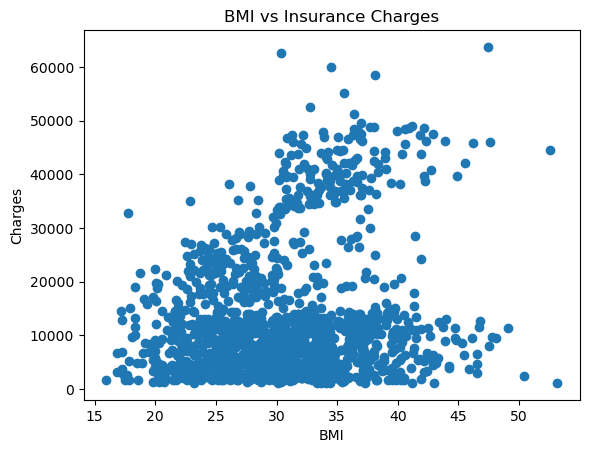

In [45]:
plt.scatter(df['bmi'], df['charges'])
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI vs Insurance Charges")
plt.show()


#### Age vs Charges

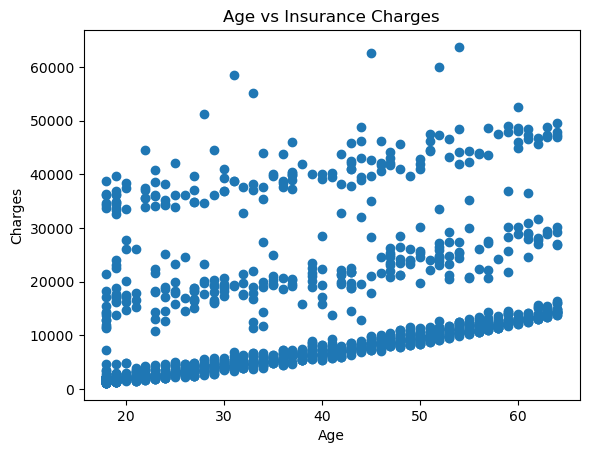

In [49]:
plt.scatter(df['age'], df['charges'])
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Age vs Insurance Charges")
plt.show()


#### Smoking Status vs Charges

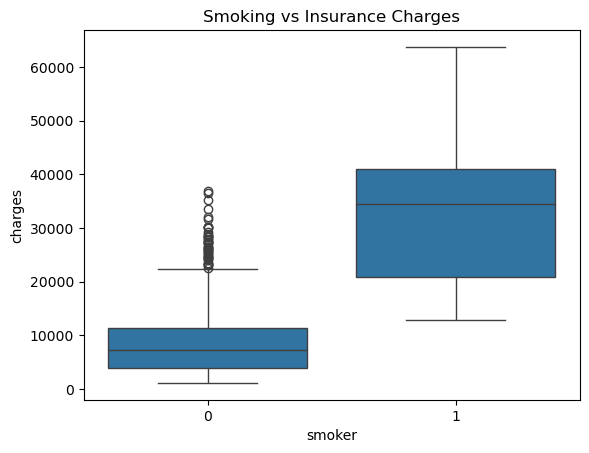

In [52]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Smoking vs Insurance Charges")
plt.show()
